In [1]:
import sqlite3


In [4]:
dbfile = 'website/database.db'

con = sqlite3.connect('database.db', check_same_thread=False)


In [9]:
cursor = con.cursor()


In [68]:
query = 'SELECT * FROM Thought WHERE data = "I'm doing a presentation and it's going well"'

In [69]:
cursor.execute(query)

OperationalError: near "m": syntax error

In [66]:
result = cursor.fetchall()

In [67]:
result

[]

In [43]:
query = "SELECT * FROM USER WHERE role = 'User'"

cursor.execute(query)

result = cursor.fetchall()



In [44]:
from frequency import word_frequency

In [45]:
query = "SELECT * FROM Thought WHERE user_id = 2"



cursor.execute(query)   

result = cursor.fetchall()

text = " ".join([i[1] for i in result])

word_freq = word_frequency(text)

In [46]:
text

'Am I tripping right now My database was deleted Pytorch is fucking me The deadline is on thursday The project deadline is very soon I wish I knew when the date of the project deadline'

In [47]:
word_freq

,word,frequency,word_freq
6,deadline,3,deadline deadline deadline
8,project,2,project project
0,tripping,1,tripping
1,right,1,right
2,database,1,database
3,deleted,1,deleted
4,pytorch,1,pytorch
5,fucking,1,fucking
7,thursday,1,thursday
9,soon,1,soon


In [48]:
query = "SELECT id, first_name FROM USER WHERE role = 'User'"

cursor.execute(query)

result = cursor.fetchall()


In [49]:
import pandas as pd
pd.DataFrame(result, columns=['id', 'name'])

,id,name
0,2,rui
1,4,tiago
2,5,cody
3,6,juliana
4,7,Baltra
5,8,Fake 1
6,9,Pedro


In [50]:
[result[i][0] for i in range(len(result))]

[2, 4, 5, 6, 7, 8, 9]

In [51]:
query = "SELECT * FROM USER"

cursor.execute(query)

result = cursor.fetchall()


In [52]:
pd.DataFrame(result)

,0,1,2,3,4
0,1,gm@gmail.com,sha256$6uqDbHqxyzGR0er2$b8f47eeef95fa05a44f6ed...,gm,Specialist
1,2,roy@gmail.com,sha256$TqGmbPh9NIkO93v4$a9a810bd9d28e44643505c...,rui,User
2,3,ze@gmail.com,sha256$jGAfJawAKBUnWWde$6a5c0c0db2e23314fb69af...,ze,Specialist
3,4,titas@gmail.com,sha256$PpIWfyP1YEeHLmNX$82360551f952bdbe1dda07...,tiago,User
4,5,cody@gmail.com,sha256$r9xVryAvXMAY7ner$979721859c4f959b8f96f2...,cody,User
5,6,jules@gmail.com,sha256$EFKia43YGSBM26PG$5310575a19d5023eed6fc8...,juliana,User
6,7,baltra@gmail.com,sha256$GNUB5cLNhX6p2uoX$b80407a6aac75970415b41...,Baltra,User
7,8,fake_user1@gmail.com,sha256$O7O0qHAY1EvJFkSN$77fc0e491d121812c29c6f...,Fake 1,User
8,9,pedro@gmail.com,sha256$kor9Ha3sXLSPFzX3$d9c0cfeb8c0ef1e0ef0de3...,Pedro,User


In [53]:
queryid = "SELECT id, first_name FROM USER WHERE role = 'User'"

cursor.execute(queryid)
result = cursor.fetchall()


userdf = pd.DataFrame(result, columns=['id', 'name'])

In [54]:
userdf['name']

0        rui
1      tiago
2       cody
3    juliana
4     Baltra
5     Fake 1
6      Pedro
Name: name, dtype: object

In [61]:
from sentiment_specialist import thought_entry_specialist

/Users/ruiferreira/opt/anaconda3/envs/pyaudio_test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import datetime
import time
import speech_recognition as sr
import pandas as pd

# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']



In [57]:

thought_entries_df = pd.DataFrame(columns = ['Thoughts','Sent_Negative','Sent_Neutral','Sent_Positive',
                                                'Sentiment'])#,'Timestamp'])

In [58]:
def specialist_test(thought):
    
    timestamp = datetime.datetime.now()

    encoded_thought = tokenizer(thought, return_tensors='pt')

    output = model(**encoded_thought)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    for i in range(len(scores)):
    
        l = labels[i]
        s = scores[i]

    
    scores_list = [scores[i] for i in range(len(scores))]
    labels_list = [labels[i] for i in range(len(scores))]
    zipped = list(zip(scores_list,labels_list))

    

    return [thought,scores[0],scores[1],scores[2], max(zipped)[1]]#,timestamp.strftime("%B %d, %Y, %H:%Mh")]

In [59]:
query = "SELECT data FROM Thought WHERE user_id = 2"

cursor.execute(query)
result = cursor.fetchall()


pd.Series(result).iteritems()

In [60]:
thought_entries_df

,Thoughts,Sent_Negative,Sent_Neutral,Sent_Positive,Sentiment


In [61]:
query = "SELECT * FROM Thought WHERE user_id = 2"

cursor.execute(query)
result = cursor.fetchall()


In [62]:
result

[(81, 'Am I tripping right now', '2022-08-29 22:25:06', 2, 'Neutral'),
 (82, 'My database was deleted', '2022-08-29 22:25:26', 2, 'Negative'),
 (83, 'Pytorch is fucking me', '2022-08-29 22:26:12', 2, 'Negative'),
 (84, 'The deadline is on thursday', '2022-08-29 22:26:35', 2, 'Neutral'),
 (85,
  'The project deadline is very soon',
  '2022-08-29 22:26:43',
  2,
  'Neutral'),
 (86,
  'I wish I knew when the date of the project deadline',
  '2022-08-29 22:26:55',
  2,
  'Neutral')]

In [63]:
spec_test = pd.DataFrame(result, columns = ['index','Thought','Timestamp','user_id','Sent_Class'])

In [64]:
spec_test = spec_test.drop(['index','Timestamp','user_id'], axis = 1)

In [65]:
spec_test.head(2)

,Thought,Sent_Class
0,Am I tripping right now,Neutral
1,My database was deleted,Negative


In [66]:
def spec_apply(row):
    
    # timestamp = datetime.datetime.now()

    encoded_thought = tokenizer(row['Thought'], return_tensors='pt')

    output = model(**encoded_thought)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    for i in range(len(scores)):
    
        l = labels[i]
        s = scores[i]

    
    scores_list = [scores[i] for i in range(len(scores))]
    labels_list = [labels[i] for i in range(len(scores))]
    zipped = list(zip(scores_list,labels_list))

    

    return [scores[0],scores[1],scores[2]]#,timestamp.strftime("%B %d, %Y, %H:%Mh")

In [67]:
spec_test.head(1)

,Thought,Sent_Class
0,Am I tripping right now,Neutral


In [68]:
len(spec_test)

6

In [69]:
y_test = spec_test.apply(spec_apply, axis = 1)

In [70]:
y_test

0        [0.4567573, 0.5201209, 0.02312184]
1       [0.7070759, 0.27931085, 0.01361324]
2    [0.96532685, 0.029208234, 0.005464999]
3     [0.07667219, 0.88977647, 0.033551324]
4       [0.0236852, 0.85072356, 0.12559128]
5     [0.35197085, 0.60673124, 0.041297942]
dtype: object

In [71]:
y_test = pd.DataFrame.from_dict(dict(zip(y_test.index, y_test.values))).transpose()

y_test.columns = ['Negative', 'Neutral', 'Positive']

In [72]:
import matplotlib.pyplot as plt

In [73]:
y_test.head(1)

,Negative,Neutral,Positive
0,0.456757,0.520121,0.023122


In [74]:
y_test

,Negative,Neutral,Positive
0,0.456757,0.520121,0.023122
1,0.707076,0.279311,0.013613
2,0.965327,0.029208,0.005465
3,0.076672,0.889776,0.033551
4,0.023685,0.850724,0.125591
5,0.351971,0.606731,0.041298


In [59]:
import seaborn as sns

def plot_spec(x,y):    

    plt.figure(figsize=(18, 5), dpi=80)

    line_plot = plt.plot(x,y)


    plt.tight_layout()


    plt.savefig('/Users/ruiferreira/Desktop/Universe/Ironhack/Bootcamp/Projects/Project 6 - FINAL/Flask App/Web App/website/static/images/line_plot.png')

    

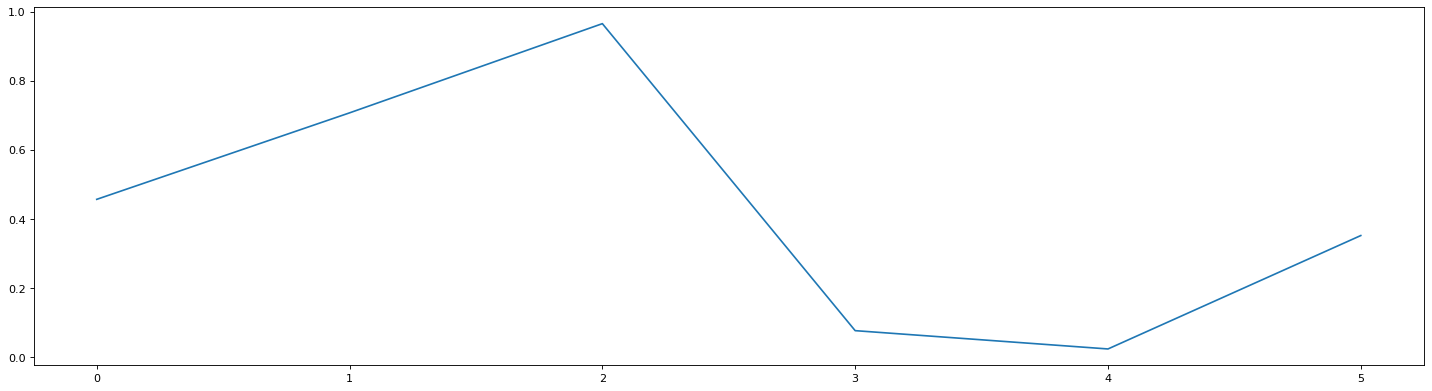

In [76]:
plot_spec(y_test.index,y_test['Negative'])

In [77]:
fake_user_df = pd.read_csv('dataset/user_1_thoughts.csv')

In [78]:
fake_user_df

,Reply
0,I would need to readjust my marketability
1,My job applications have been rejected for a t...
2,It would ruin my gpa.
3,worry
4,I am fond of coworker who i asked to go out wi...
...,...
1995,I'm working on this as fast as I possibly can
1996,"No matter what I do, I'll still be fat."
1997,I would go for a walk or something and then tr...
1998,Annoyed


In [56]:
def spec_apply(row):
    
    # timestamp = datetime.datetime.now()

    encoded_thought = tokenizer(row['Thought'], return_tensors='pt')

    output = model(**encoded_thought)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    for i in range(len(scores)):
    
        l = labels[i]
        s = scores[i]

    
    scores_list = [scores[i] for i in range(len(scores))]
    labels_list = [labels[i] for i in range(len(scores))]
    zipped = list(zip(scores_list,labels_list))

    

    return [scores[0],scores[1],scores[2]]#,timestamp.strftime("%B %d, %Y, %H:%Mh")

In [80]:
from randomtimestamp import randomtimestamp

In [81]:
randomtimestamp()

datetime.datetime(2007, 11, 25, 8, 43, 52)

In [82]:
## USER_ID of fake user is #8
# timestamp.strftime("%B %d, %Y, %H:%Mh")]


In [60]:
from datetime import datetime
import numpy as np

In [84]:
randomtimestamp(start = datetime(2021, 9, 3, 22, 44, 44), end = datetime(2022, 8, 29, 22, 44, 44)).strftime("%Y-%m-%d %H:%M:%S")


'2022-05-05 04:10:12'

In [85]:
fake_user_df['Timestamp'] = randomtimestamp(start = datetime(2021, 9, 3, 22, 44, 44), end = datetime(2022, 8, 29, 22, 44, 44)).strftime("%Y-%m-%d %H:%M:%S")

In [86]:
len(fake_user_df)

2000

In [87]:
fake_user_df['Timestamp'] = [randomtimestamp(start = datetime(2021, 9, 3), end = datetime(2022, 8, 29)).strftime("%Y-%m-%d %H:%M:%S") for i in range(len(fake_user_df))]

In [88]:
fake_user_df.columns = ['Thought','Timestamp']

In [89]:
fake_user_df



,Thought,Timestamp
0,I would need to readjust my marketability,2022-03-25 16:59:13
1,My job applications have been rejected for a t...,2021-10-13 07:28:43
2,It would ruin my gpa.,2022-04-08 04:53:06
3,worry,2022-08-20 14:32:48
4,I am fond of coworker who i asked to go out wi...,2022-07-09 00:44:12
...,...,...
1995,I'm working on this as fast as I possibly can,2022-01-05 00:35:02
1996,"No matter what I do, I'll still be fat.",2022-04-30 13:41:15
1997,I would go for a walk or something and then tr...,2022-02-25 17:37:30
1998,Annoyed,2022-05-03 14:13:42


In [90]:
fake_sentiments = fake_user_df.apply(spec_apply, axis = 1)



In [112]:
fake_sentiments_new = pd.DataFrame.from_dict(dict(zip(fake_sentiments.index, fake_sentiments.values))).transpose()

In [113]:
fake_sentiments_new.columns = ['Negative', 'Neutral', 'Positive']

In [114]:
fake_sentiments_new

,Negative,Neutral,Positive
0,0.304608,0.663896,0.031495
1,0.960289,0.037337,0.002374
2,0.946983,0.049399,0.003619
3,0.461834,0.481647,0.056519
4,0.015774,0.119197,0.865029
...,...,...,...
1995,0.005255,0.241796,0.752949
1996,0.723214,0.255462,0.021324
1997,0.011995,0.794427,0.193578
1998,0.808360,0.173327,0.018313


In [115]:
fake_sentiments_new['Timestamp'] = [randomtimestamp(start = datetime(2021, 9, 3, 22, 44, 44), end = datetime(2022, 8, 29, 22, 44, 44)).strftime("%Y-%m-%d") for i in range(len(fake_user_df))]

In [116]:
fake_sentiments_new = fake_sentiments_new.sort_values(by = 'Timestamp')

# plot_spec(fake_sentiments['Timestamp'],fake_sentiments['Positive'])

In [117]:
fake_sentiments_new.to_csv('fake_sentiments_new.csv', index = False)

In [118]:
fake_sentiments_new = pd.read_csv('fake_sentiments_new.csv')

In [119]:
fake_groupby = fake_sentiments_new.groupby('Timestamp').agg({'Positive':'mean'})

In [120]:
fake_groupby

,Positive
Timestamp,
2021-09-04,0.021971
2021-09-05,0.027663
2021-09-06,0.056498
2021-09-07,0.087281
2021-09-08,0.011658
...,...
2022-08-25,0.021607
2022-08-26,0.057713
2022-08-27,0.007383


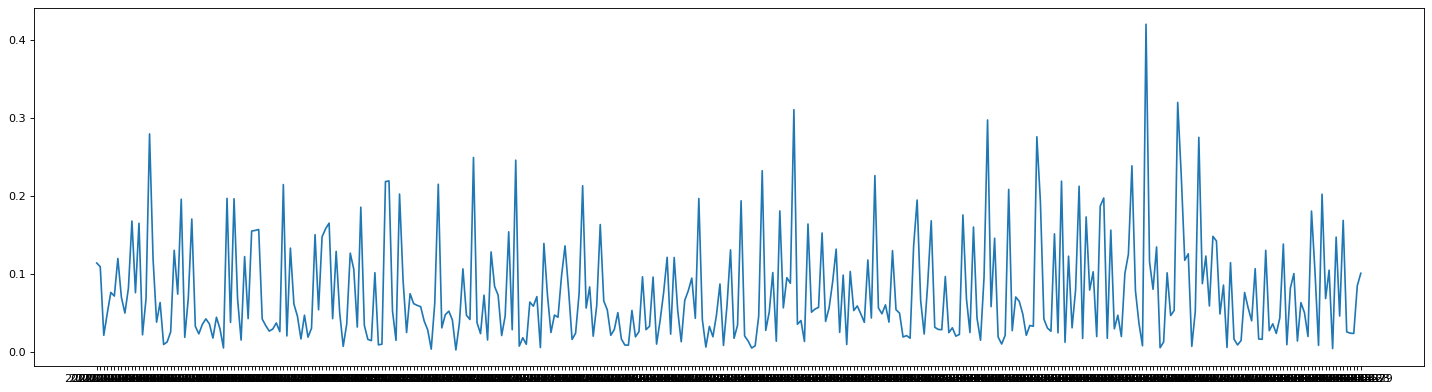

In [100]:
plot_spec(fake_groupby.index,fake_groupby['Positive'])

In [101]:
# faking the data to be the same as the SQL database

In [102]:
# fake_user_df['Timestamp'] = [randomtimestamp(start = datetime(2021, 9, 3, 22, 44, 44), end = datetime(2022, 8, 29, 22, 44, 44)).strftime("%Y-%m-%d %H:%M:%S") for i in range(len(fake_user_df))]

In [103]:
import pandas as pd


In [121]:
fakes_df = pd.read_csv('dataset/user_1_thoughts.csv')

In [122]:
len(fakes_df)

2000

In [123]:
fakes_df

,Reply
0,I would need to readjust my marketability
1,My job applications have been rejected for a t...
2,It would ruin my gpa.
3,worry
4,I am fond of coworker who i asked to go out wi...
...,...
1995,I'm working on this as fast as I possibly can
1996,"No matter what I do, I'll still be fat."
1997,I would go for a walk or something and then tr...
1998,Annoyed


In [124]:
fakes_df['user_id'] = 8

In [125]:
fakes_df['Timestamp'] = fake_user_df['Timestamp']

In [126]:
fakes_df.reset_index(inplace=True)


In [110]:
fakes_df['index'] = fakes_df['index'] + 81

In [128]:
fakes_df.head(1)

,index,Reply,user_id,Timestamp
0,0,I would need to readjust my marketability,8,2022-03-25 16:59:13


In [129]:
fakes_df['sentiment_class'] = 'Neutral'

In [130]:
fakes_df.columns  = ['id','data','user_id','date','sentiment_class']

In [131]:
fakes_df.head(1)

,id,data,user_id,date,sentiment_class
0,0,I would need to readjust my marketability,8,2022-03-25 16:59:13,Neutral


In [132]:
fakes_df = fakes_df[['id', 'data','date','user_id','sentiment_class']]

In [135]:
# fakes_df['id'] = fakes_df['id'] + 90

In [136]:
sql = 'SELECT * FROM Thought'

cursor.execute(sql)

result = cursor.fetchall()

result

[(1, 'thought', '2022-06-19 15:53:32\t', 8, 'Neutral'),
 (46, 'i think about my dog\r\n', '2022-08-27 17:08:20', 6, 'Neutral'),
 (47, 'i like to eat', '2022-08-27 17:08:24', 6, 'Positive'),
 (48, 'i watch spirits', '2022-08-27 17:08:28', 6, 'Neutral'),
 (49, 'i watch spirits', '2022-08-27 17:08:55', 6, 'Neutral'),
 (50, 'spirits', '2022-08-27 17:08:58', 6, 'Neutral'),
 (53, 'rua', '2022-08-27 21:20:53', 7, 'Neutral'),
 (54, 'street', '2022-08-27 21:20:54', 7, 'Neutral'),
 (55, 'street', '2022-08-27 21:20:56', 7, 'Neutral'),
 (56, 'street', '2022-08-27 21:21:06', 7, 'Neutral'),
 (57, 'hello street', '2022-08-27 21:21:10', 7, 'Neutral'),
 (77, "I don't like Sam", '2022-08-29 12:16:14', 9, 'Negative'),
 (78, "Sam isn't cool", '2022-08-29 12:16:18', 9, 'Negative'),
 (79, 'Sam Sam Sam', '2022-08-29 12:16:31', 9, 'Neutral'),
 (80, 'Ping pong', '2022-08-29 12:16:36', 9, 'Neutral'),
 (81, 'Am I tripping right now', '2022-08-29 22:25:06', 2, 'Neutral'),
 (82, 'My database was deleted', '2022-08

In [137]:
fakes_df

,id,data,date,user_id,sentiment_class
0,90,I would need to readjust my marketability,2022-03-25 16:59:13,8,Neutral
1,91,My job applications have been rejected for a t...,2021-10-13 07:28:43,8,Neutral
2,92,It would ruin my gpa.,2022-04-08 04:53:06,8,Neutral
3,93,worry,2022-08-20 14:32:48,8,Neutral
4,94,I am fond of coworker who i asked to go out wi...,2022-07-09 00:44:12,8,Neutral
...,...,...,...,...,...
1995,2085,I'm working on this as fast as I possibly can,2022-01-05 00:35:02,8,Neutral
1996,2086,"No matter what I do, I'll still be fat.",2022-04-30 13:41:15,8,Neutral
1997,2087,I would go for a walk or something and then tr...,2022-02-25 17:37:30,8,Neutral
1998,2088,Annoyed,2022-05-03 14:13:42,8,Neutral


In [139]:
import random

In [140]:
iterate = list(zip(fakes_df['id'], fakes_df['data'],fakes_df['date'],fakes_df['user_id'],fakes_df['sentiment_class'])) ## list(zip()) puts the column actor_id and full_name together in a list of tuples


In [145]:
fakes_df['date'] =  pd.to_datetime(fakes_df['date'])


In [184]:
fakes_df.dtypes

id                          int64
data                       object
date               datetime64[ns]
user_id                     int64
sentiment_class            object
dtype: object

In [175]:
# fakes_df.to_csv('fake_df_final.csv', index = False)

In [149]:
iterate = list(zip(fakes_df['id'], fakes_df['data'],fakes_df['date'],fakes_df['user_id'],fakes_df['sentiment_class'])) ## list(zip()) puts the column actor_id and full_name together in a list of tuples


In [150]:
iterate

[(90,
  'I would need to readjust my marketability',
  Timestamp('2022-03-25 16:59:13'),
  8,
  'Neutral'),
 (91,
  'My job applications have been rejected for a third time this week.',
  Timestamp('2021-10-13 07:28:43'),
  8,
  'Neutral'),
 (92, 'It would ruin my gpa.', Timestamp('2022-04-08 04:53:06'), 8, 'Neutral'),
 (93, 'worry ', Timestamp('2022-08-20 14:32:48'), 8, 'Neutral'),
 (94,
  'I am fond of coworker who i asked to go out with and he/she said s/he was too busy',
  Timestamp('2022-07-09 00:44:12'),
  8,
  'Neutral'),
 (95,
  "I won't have friends and I'll be alone. ",
  Timestamp('2021-12-07 06:15:15'),
  8,
  'Neutral'),
 (96, 'I am not interesting.', Timestamp('2021-11-30 15:57:16'), 8, 'Neutral'),
 (97, 'resentment', Timestamp('2021-11-30 19:37:37'), 8, 'Neutral'),
 (98,
  'I would feel bad due to the fact that parties re all about enjoying and mingling.And this situation would make me feel unwanted.',
  Timestamp('2022-02-01 09:00:23'),
  8,
  'Neutral'),
 (99,
  'This 

In [151]:
 #for index,data,date,user_id,sent in iterate:
#     date = datetime.strftime(date, format=("%Y-%m-%d %H:%M:%S"))
#     cursor.execute(
#         "INSERT INTO Thought(id, data, date, user_id, sentiment_class) values (?, ?, ?, ?, ?)",
#         (index, data, date,8,'Neutral') 
#     )

# con.commit()

In [152]:
sql = 'SELECT * FROM Thought'

cursor.execute(sql)

result = cursor.fetchall()


In [169]:
result[2001]

IndexError: list index out of range

In [156]:
len(result)

2021

In [244]:
sql = "UPDATE User SET first_name = 'Cody' WHERE first_name = 'cody'"

cursor.execute(sql)

result = cursor.fetchall()

con.commit()


In [245]:
sql = "SELECT first_name FROM USER"

cursor.execute(sql)

result = cursor.fetchall()



In [246]:
result

[('Gladys',),
 ('Roy',),
 ('José',),
 ('Tiago',),
 ('Cody',),
 ('Juliana',),
 ('Baltra',),
 ('John',),
 ('Pedro',)]

In [243]:
## CREATE THE TIME SERIES



In [176]:
fake_df_final = pd.read_csv('fake_df_final.csv')

In [177]:
fake_sentiments_new = pd.read_csv('fake_sentiments_new.csv')

In [178]:
len(fake_df_final)

2000

In [179]:
time_series = fake_df_final

In [180]:
time_series[['Negative','Neutral','Positive']] = fake_sentiments_new[['Negative','Neutral','Positive']]

In [183]:
time_series.to_csv('time_series_fake.csv', index = False)

In [185]:
sql = 'SELECT * FROM Thought WHERE user_id = 2'

cursor.execute(sql)

result = cursor.fetchall()

In [190]:
result

[(81, 'Am I tripping right now', '2022-08-29 22:25:06', 2, 'Neutral'),
 (82, 'My database was deleted', '2022-08-29 22:25:26', 2, 'Negative'),
 (83, 'Pytorch is fucking me', '2022-08-29 22:26:12', 2, 'Negative'),
 (84, 'The deadline is on thursday', '2022-08-29 22:26:35', 2, 'Neutral'),
 (85,
  'The project deadline is very soon',
  '2022-08-29 22:26:43',
  2,
  'Neutral'),
 (86,
  'I wish I knew when the date of the project deadline',
  '2022-08-29 22:26:55',
  2,
  'Neutral'),
 (2090, 'Tiago is annoying me', '2022-08-30 14:32:59', 2, 'Negative'),
 (2091,
  'input of very negative thoughts',
  '2022-08-30 17:05:58',
  2,
  'Negative'),
 (2092, 'i feel bad', '2022-08-30 17:06:06', 2, 'Negative'),
 (2093, 'i feel terrible', '2022-08-30 17:06:10', 2, 'Negative'),
 (2094, 'i feel awful', '2022-08-30 17:06:14', 2, 'Negative'),
 (2095, 'i feel bad and terrible', '2022-08-30 17:06:19', 2, 'Negative'),
 (2096, "my friends don't like me", '2022-08-30 17:06:24', 2, 'Negative'),
 (2097, 'nobody 

In [191]:
roy_df = pd.DataFrame(result, columns=['id','Thought','date','user_id','Sent_Class'])

In [194]:
roy_df.drop(['id','user_id','Sent_Class'], inplace = True, axis = 1)

In [196]:
roy_df_sentiment = roy_df.apply(spec_apply, axis = 1)

In [198]:
roy_df_sentiment

roy_df_sentiment = pd.DataFrame.from_dict(dict(zip(roy_df_sentiment.index, roy_df_sentiment.values))).transpose()

roy_df_sentiment.columns = ['Negative', 'Neutral', 'Positive']

In [200]:
roy_df_sentiment['date'] = roy_df['date']

In [204]:
roy_df_sentiment = roy_df_sentiment[['Positive','date']]

In [207]:
roy_df_sentiment = roy_df_sentiment.set_index('date')

In [209]:
roy_df_sentiment.to_csv('roy_df_sentiment.csv')

In [6]:
queryid = "SELECT * FROM Thought"

cursor.execute(queryid)
        
result = cursor.fetchall()


In [13]:
import pandas as pd

In [30]:
x = pd.DataFrame(result)



In [22]:
x  =x.style.hide(axis = 'index')


In [31]:
x.tail(10).style(axis='index')

TypeError: 'Styler' object is not callable

In [35]:
type(x.tail(10).style.hide(axis = 'index'))

pandas.io.formats.style.Styler

In [43]:
test_df = pd.DataFrame(columns = ['Thought','Positive'])


In [79]:
test_df

,Thought,Positive


In [80]:
sql = 'SELECT * FROM Thought WHERE user_id = 2'

cursor.execute(sql)

result = cursor.fetchall()

In [83]:
x = pd.DataFrame(result, columns = ['index','Thought','Timestamp','user_id','Sentiment'])

In [84]:
x = x.drop(['index','user_id'], axis = 1)


In [100]:
y = x[:50].apply(spec_apply, axis = 1)

y = pd.DataFrame.from_dict(dict(zip(y.index, y.values))).transpose()

In [101]:
y.columns = ['Negative', 'Neutral', 'Positive']

In [103]:
y_test = y['Positive'].reset_index()

In [105]:
y_test.columns = [['Thought', 'Positive']]

In [106]:
y_test.to_csv('y_test.csv', index = False)

In [ ]:
y_test

In [123]:
import matplotlib.pyplot as plt

In [114]:
import plotly

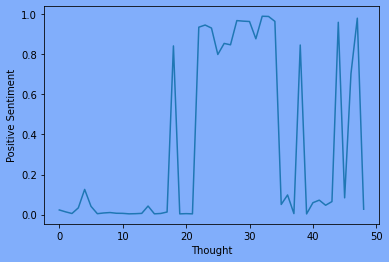

In [151]:
fig = plt.figure()

plt.plot(y_test.index, y_test['Positive'])

plt.xlabel("Thought")

plt.ylabel("Positive Sentiment")

ax = plt.gca()

ax.set_facecolor((129/255,174/255,251/255))

fig.patch.set_facecolor((129/255,174/255,251/255))



In [155]:
np.array([110, 160, 246])/255

array([0.43137255, 0.62745098, 0.96470588])